<a href="https://colab.research.google.com/github/kayodeolusanya/Volvo-Auto-Price-Research/blob/main/Volvo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Overview

A Swedish automobile company Volvo Auto aspires to enter the Nigerian
market by setting up its manufacturing unit and producing cars locally to
compete with their Nigerian, US and European counterparts.
They have contacted me as a Data Scientist to understand the factors on which
the pricing of cars depends. Specifically, they want to understand the factors
affecting the pricing of cars in the Nigerian market, since those may be very
different from the Swedish market.

The company wants to know:

● Which variables are significant in predicting the price of a
car.

● How well do those variables describe the price of a car.


Based on various market surveys, I have gathered a large data set of
different types of cars across the Nigerian market.


In [ ]:
#Import our library

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sb

###EXPLORATORY DATA ANALYSIS

In [ ]:
df = pd.read_csv('CarPrice_data.csv')

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


UNIVARIATE ANALYSIS

<Axes: xlabel='price', ylabel='Count'>

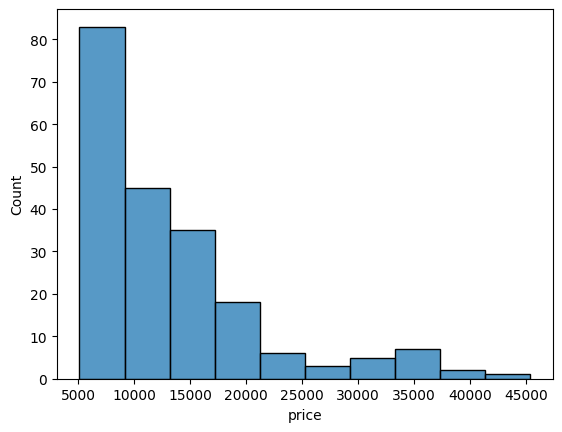

In [ ]:
sb.histplot(df['price'], bins= 10)

- We observe that the dist´ribution of the car is positively skewed.

- From our data, a greater number of car falls within the price range of N5,000 - N20,000.

In [ ]:
#Univariate distribution of the Car Fuel type

<Axes: xlabel='fueltype', ylabel='count'>

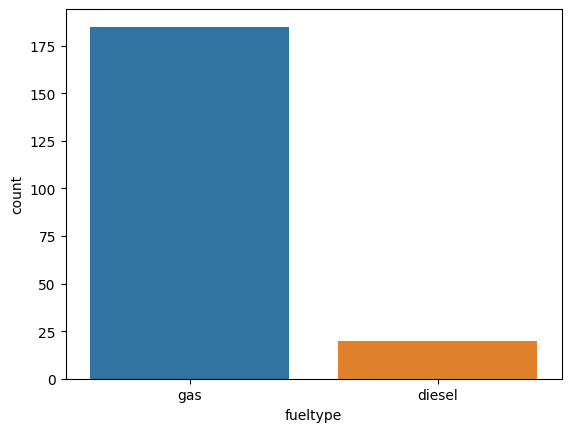

In [ ]:
sb.countplot(x='fueltype', data= df)

<Axes: xlabel='carwidth', ylabel='Count'>

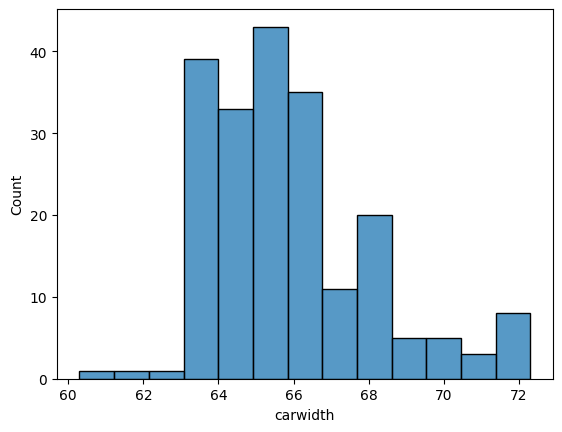

In [ ]:
sb.histplot(x='carwidth', data= df)

In [ ]:
*# Univariate distribution of engine type

<Axes: xlabel='enginetype', ylabel='count'>

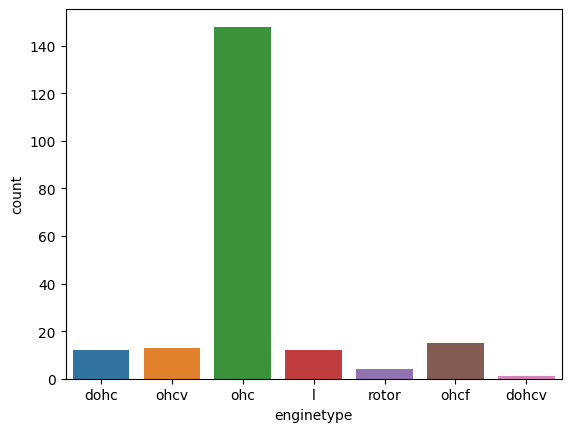

In [ ]:
sb.countplot(x='enginetype', data= df)

- We can observe that most cars in the dataset run on ohc engine type

In [ ]:
#univariate distribution of the car body

<Axes: xlabel='carbody', ylabel='count'>

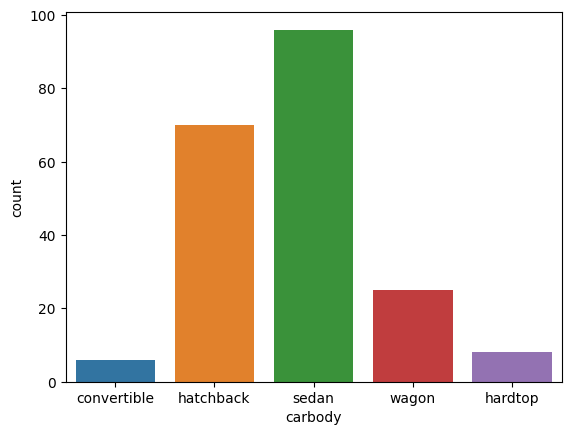

In [ ]:
sb.countplot(x='carbody', data=df)

####BIVARIATE ANALYSIS

In [ ]:
#Comparing the relationship between Price and Price

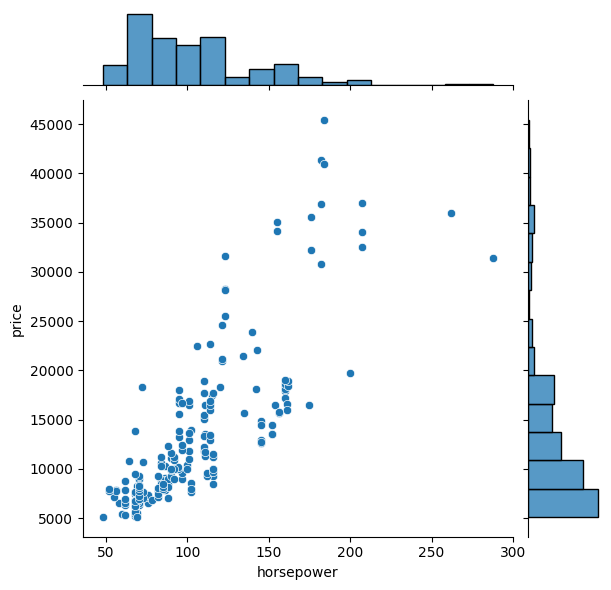

In [ ]:
sb.jointplot(x='horsepower', y='price',data= df)

- We can observe a positive relationship between the horsepower and our dependent variable price

- Horsepower feature is fairly semmetrical, though there are some outliers.

In [ ]:
#Checking the relationship between car engine location and Car Price

<Axes: xlabel='enginelocation', ylabel='price'>

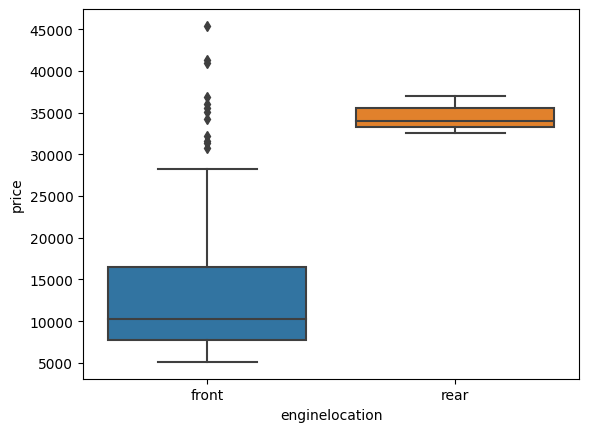

In [ ]:
sb.boxplot(x='enginelocation', y='price', data= df )

- We can observe that on average less expensive cars( between 7,000 to 17,000) have there engines in front of the cars.

- It should be noted that outliers was detected as there were expensive cars that have engines located in the front.

- We also obseve that all cars with engine at the back are fairly expensive.

<Axes: xlabel='enginelocation', ylabel='enginesize'>

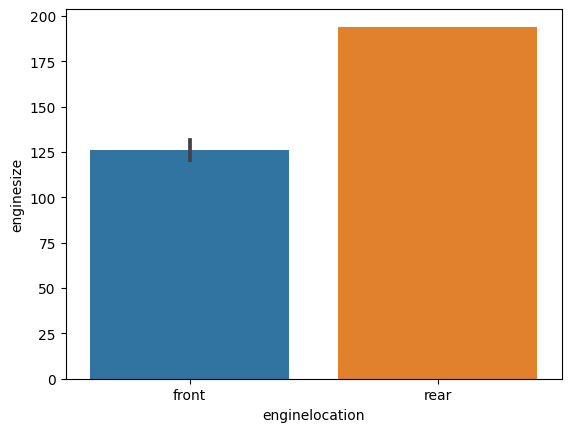

In [ ]:
sb.barplot(x='enginelocation', y= 'enginesize', data= df)

The barplot shows that rear engine cars tend to larger engine size than front engine cars.

#Relationship between

In [ ]:
#Relationship between Engine Type and Miles per Galon

<Axes: xlabel='enginetype', ylabel='highwaympg'>

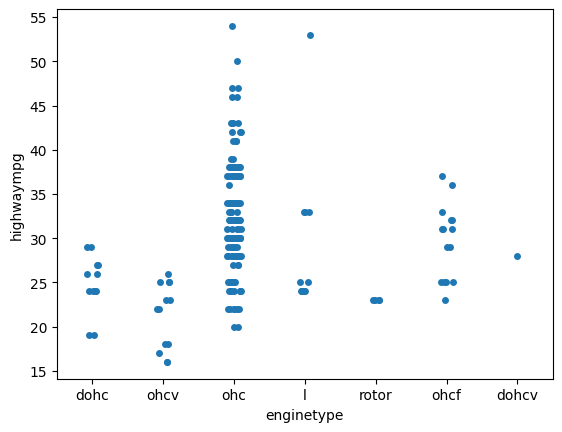

In [ ]:
sb.stripplot(x='enginetype',y='highwaympg', data=df)

The OHC engine types which is very popular appears to have a higher MPG.

In [ ]:
#Relationship between Car Body and Price

<Axes: xlabel='carbody', ylabel='price'>

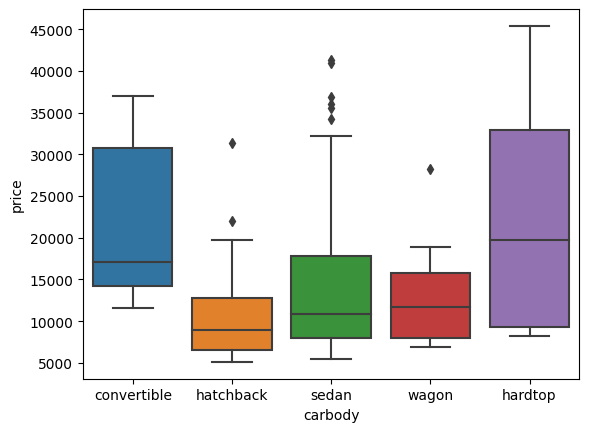

In [ ]:
sb.boxplot(x='carbody', y='price', data= df)

- We can observe and average hardtop and convertible is more expensive than other cars

In [ ]:
#Car body vs enginelocation vs price

<Axes: xlabel='carbody', ylabel='price'>

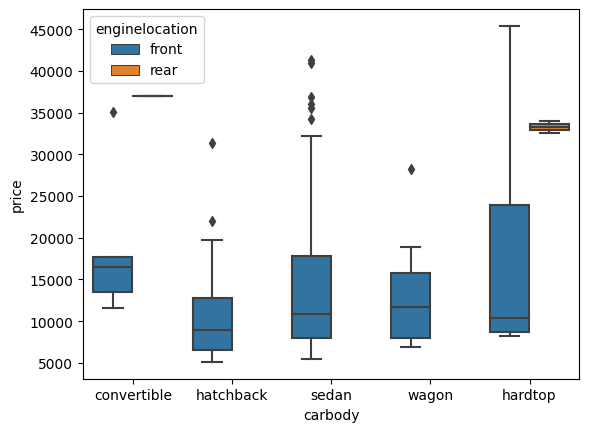

In [ ]:
sb.boxplot(x='carbody', y= 'price', hue='enginelocation', data=df)

In [ ]:
#Car body vs enginetype vs price

<Axes: xlabel='carbody', ylabel='price'>

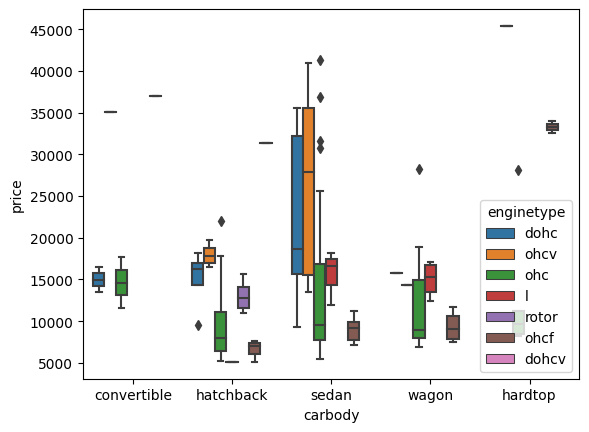

In [ ]:
sb.boxplot(x='carbody', y= 'price', hue='enginetype', data=df)

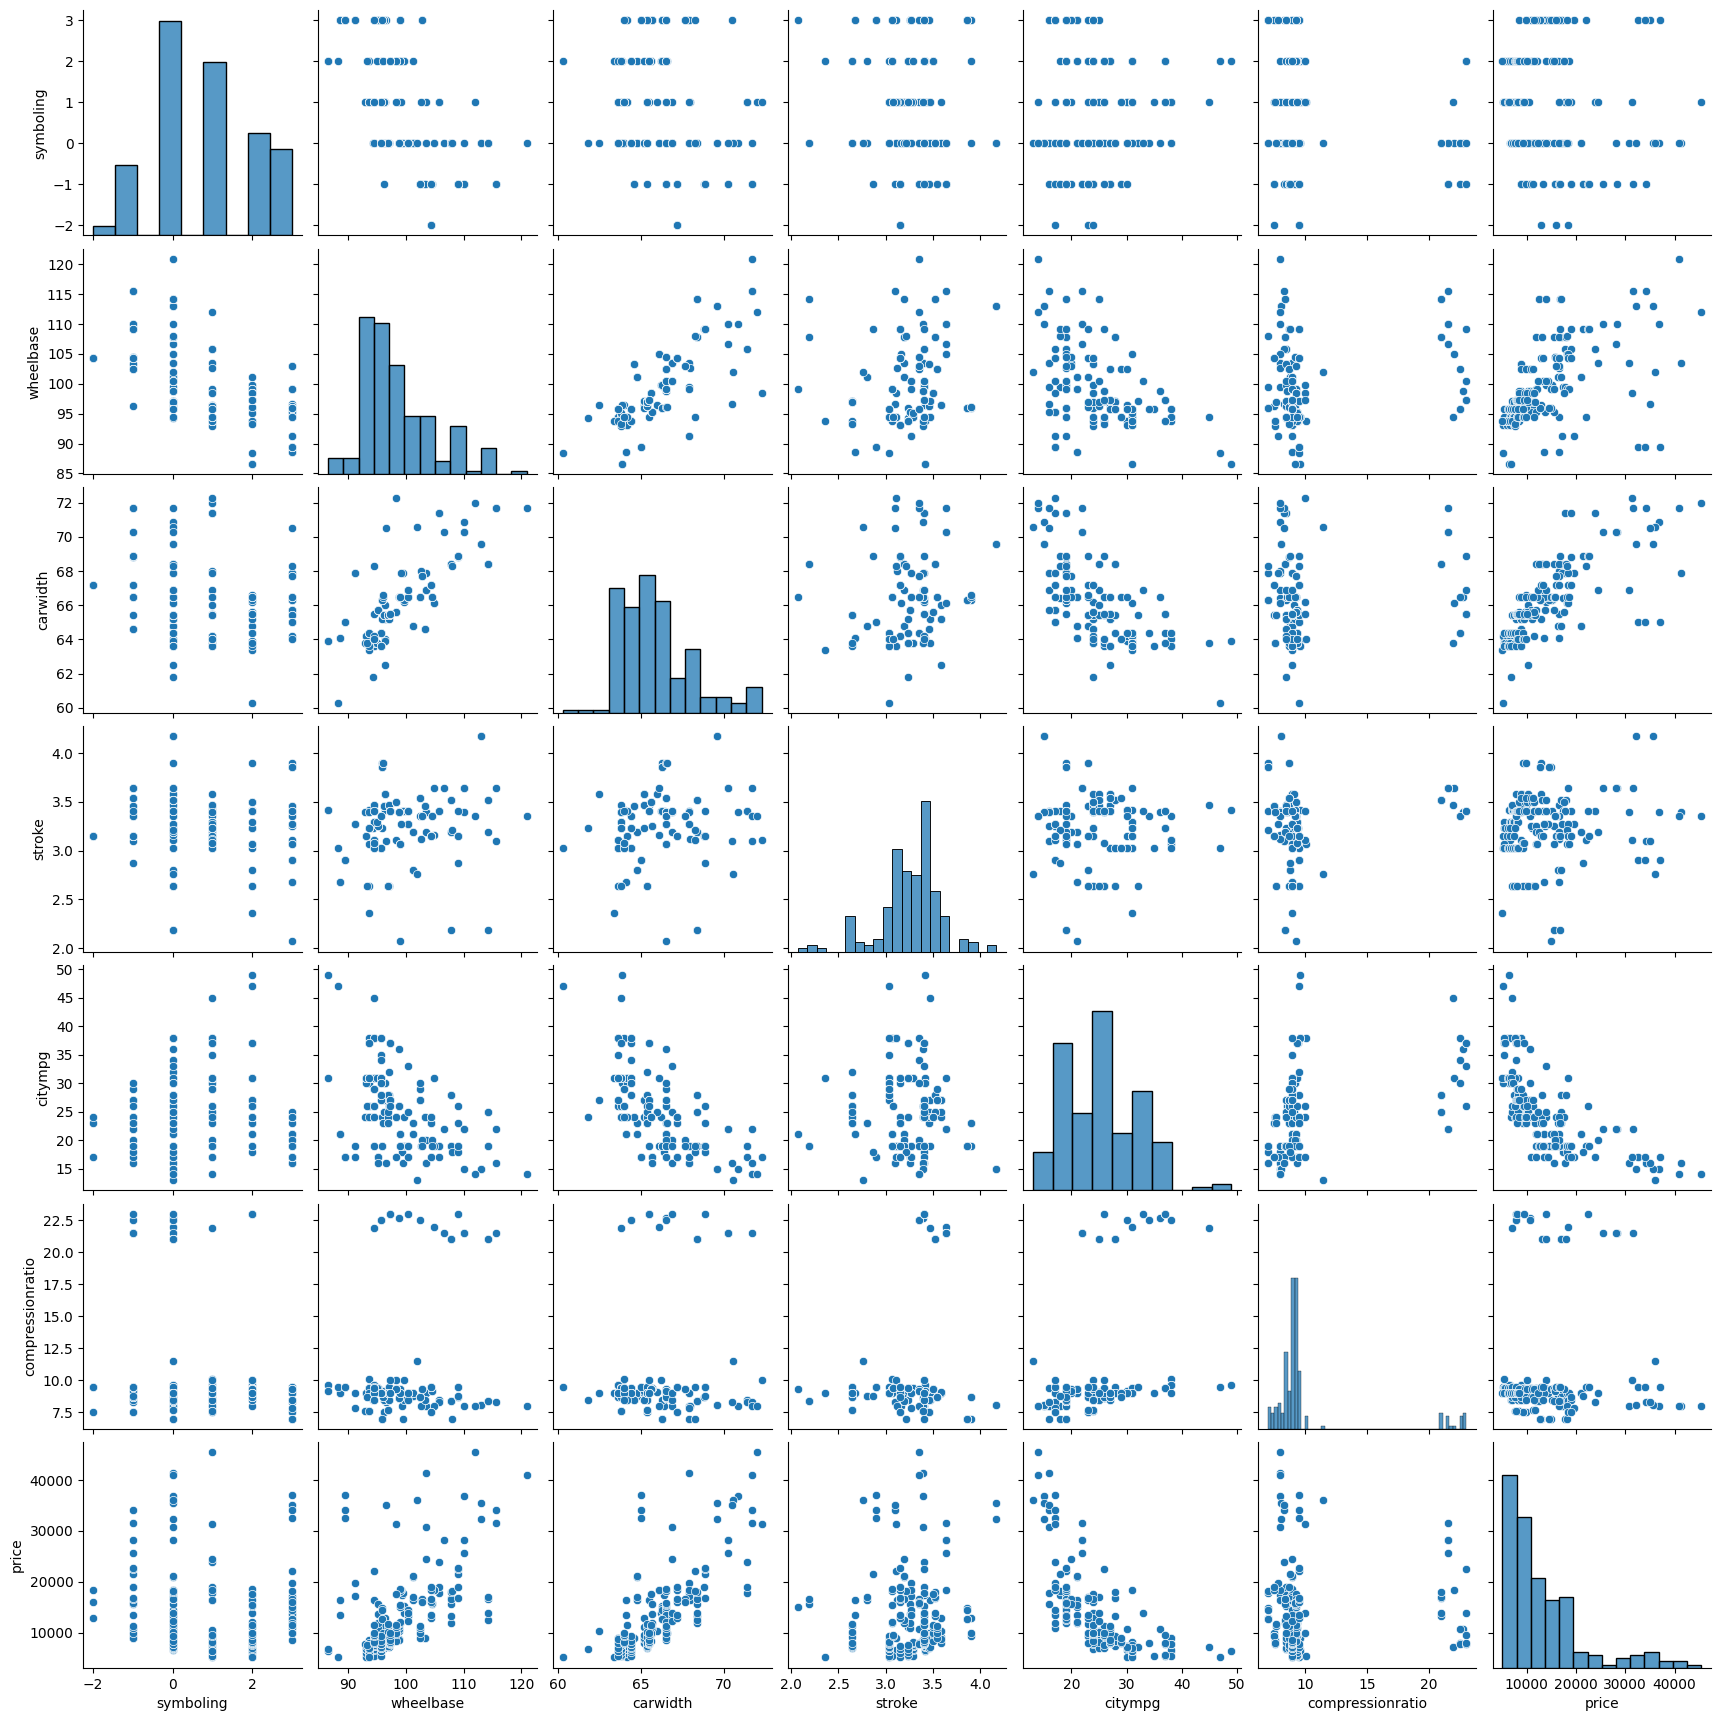

In [ ]:
var = ['symboling','wheelbase','carwidth','stroke', 'citympg','compressionratio', 'price']
sb.pairplot(df[var])

<Axes: >

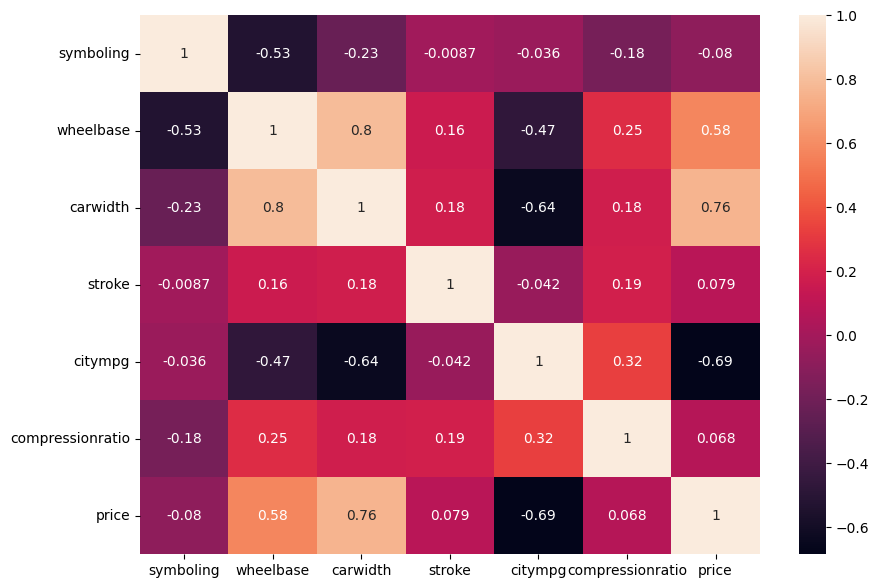

In [ ]:
plt.figure(figsize=(10,7))
sb.heatmap(df[var].corr(), annot=True)

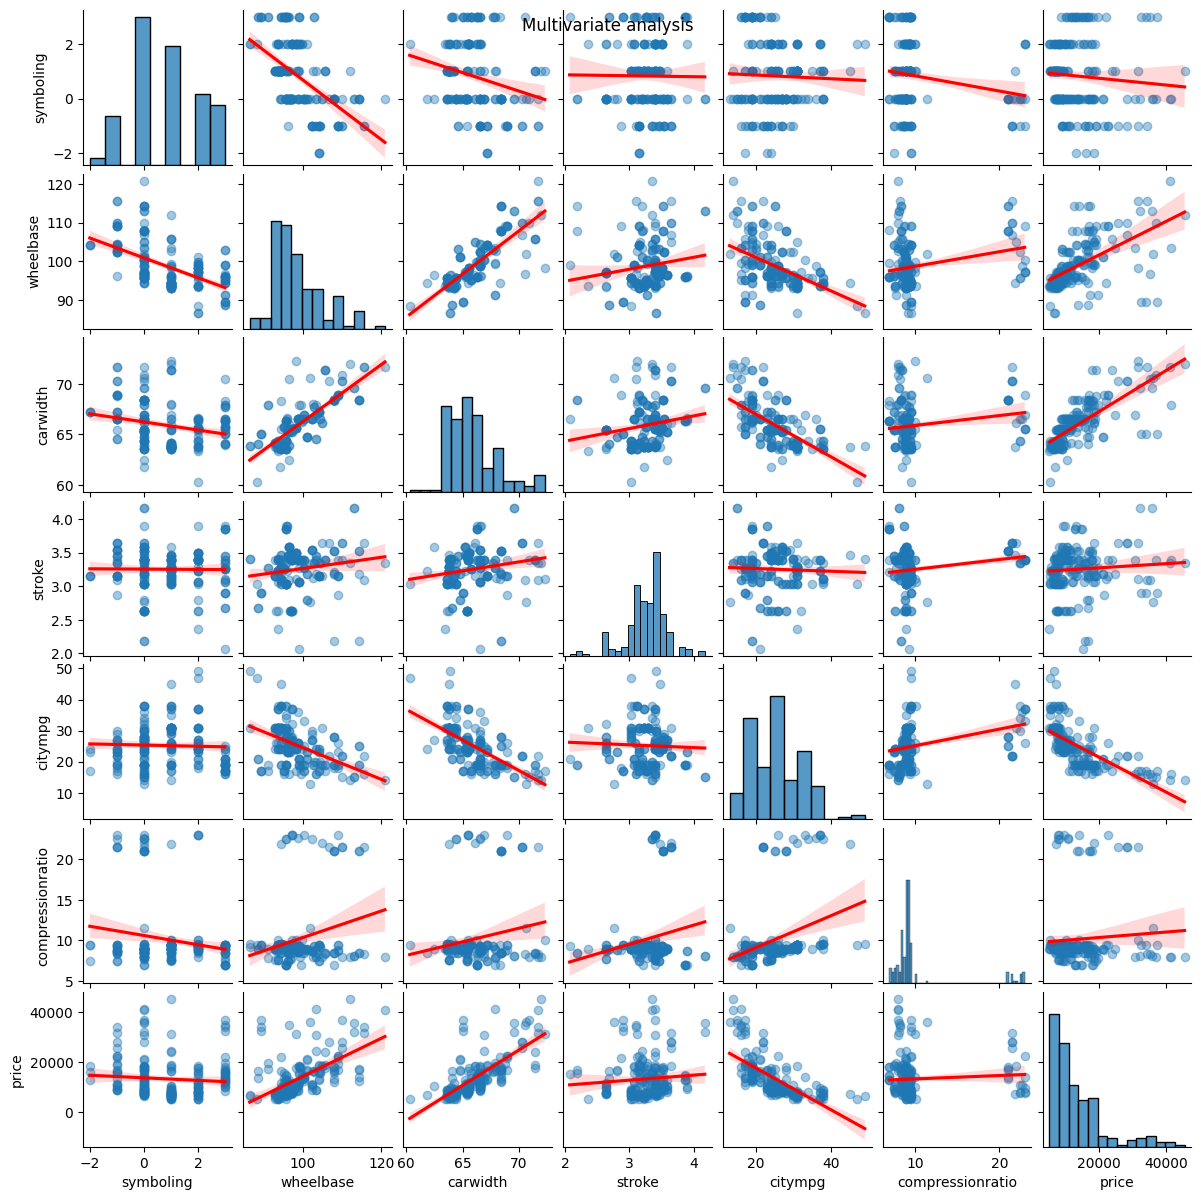

In [ ]:
g = sb.pairplot(df[var],kind='reg',plot_kws={'line_kws':{'color':'red'}, 'scatter_kws':{'alpha':0.4}})
g.fig.set_size_inches(12,12)
g.fig.suptitle('Multivariate analysis');

BUSINESS INSIGHTS